In [1]:
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

2025-02-09 18:47:13.702587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739123233.716099 2566310 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739123233.719955 2566310 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 18:47:13.733819: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

# 🔹 Отключение GPU
tf.config.set_visible_devices([], 'GPU')
# Определяем входные тензоры
x = tf.constant(2.0)
y = tf.constant(3.0)
w = tf.constant(4.0)

# Операции в графе
sum_xy = x + y
z = sum_xy * w

print(z)  # tf.Tensor(20.0, shape=(), dtype=float32)

tf.Tensor(20.0, shape=(), dtype=float32)


In [5]:
import torch

# Определяем переменные
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
w = torch.tensor(4.0, requires_grad=True)

# Вычисления
sum_xy = x + y
z = sum_xy * w

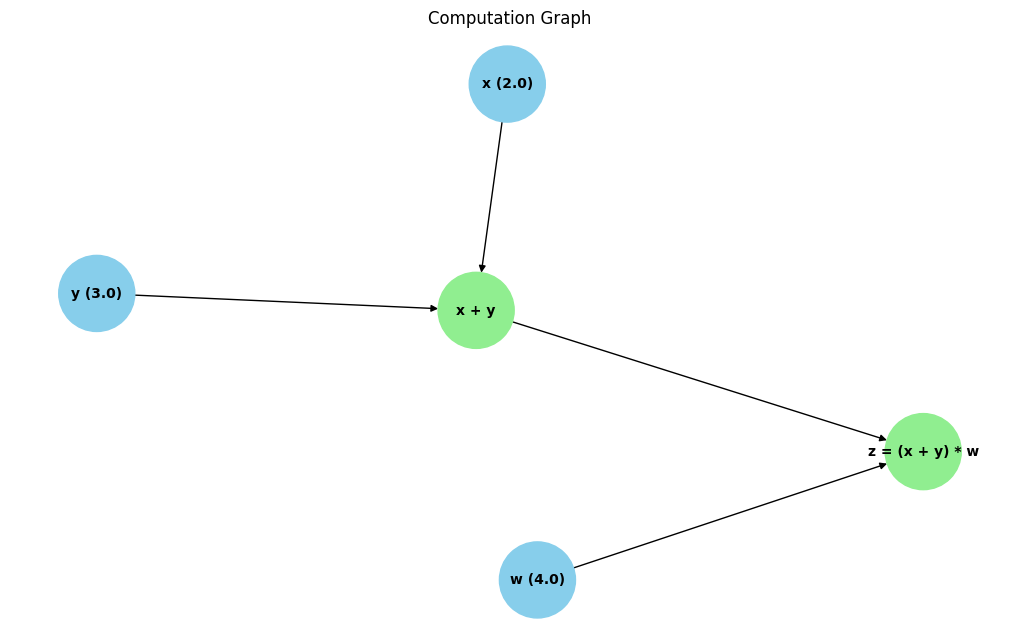

In [6]:
# Построение графа вручную
graph = nx.DiGraph()

# Узлы и связи
graph.add_node("x", label="x (2.0)", color="skyblue")
graph.add_node("y", label="y (3.0)", color="skyblue")
graph.add_node("+", label="x + y", color="lightgreen")
graph.add_node("w", label="w (4.0)", color="skyblue")
graph.add_node("*", label="z = (x + y) * w", color="lightgreen")

graph.add_edges_from([
    ("x", "+"),
    ("y", "+"),
    ("+", "*"),
    ("w", "*")
])

# Визуализация графа
pos = nx.spring_layout(graph)  # Расположение узлов
colors = [graph.nodes[node].get('color', 'white') for node in graph.nodes]

plt.figure(figsize=(10, 6))
nx.draw(
    graph, pos, with_labels=True,
    labels=nx.get_node_attributes(graph, "label"),
    node_size=3000, node_color=colors,
    font_size=10, font_weight="bold"
)
plt.title("Computation Graph")
plt.show()

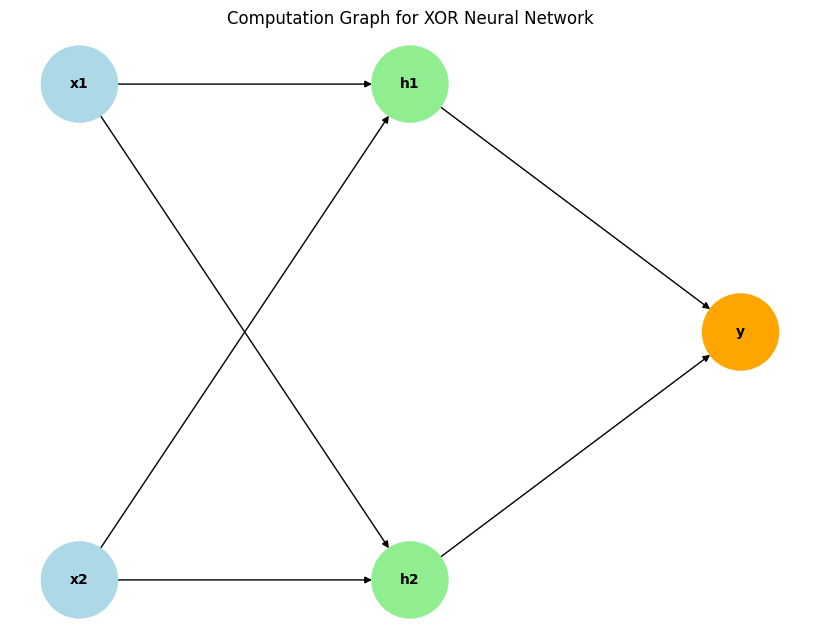

In [15]:
# 🔹 Шаг 1: Определение данных
np.random.seed(42)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Входные данные (логическое XOR)
y = np.array([[0], [1], [1], [0]])             # Целевые значения

# 🔹 Шаг 2: Инициализация весов
input_dim = 2
hidden_dim = 2
output_dim = 1

W1 = np.random.randn(input_dim, hidden_dim) * 0.5  # Входной слой -> скрытый слой
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.5  # Скрытый слой -> выходной слой
b2 = np.zeros((1, output_dim))


#2.1 Vizualization of Graph
# Построение графа вручную
graph = nx.DiGraph()
# 🔹 Узлы
# Входные узлы
graph.add_node("x1", label="x1", color="lightblue")
graph.add_node("x2", label="x2", color="lightblue")

# Скрытые узлы
graph.add_node("h1", label="h1", color="lightgreen")
graph.add_node("h2", label="h2", color="lightgreen")

# Выходной узел
graph.add_node("y", label="y", color="orange")

# 🔹 Ребра
# Вход -> Скрытый слой
graph.add_edges_from([
    ("x1", "h1"),
    ("x1", "h2"),
    ("x2", "h1"),
    ("x2", "h2")
])


# Скрытый слой -> Выход
graph.add_edges_from([
    ("h1", "y"),
    ("h2", "y")
])

# Задаём фиксированные позиции узлов
positions = {
    "x1": (-2, 1),   # Левый столбец (входы)
    "x2": (-2, -1),
    "h1": (0, 1),    # Средний столбец (скрытые узлы)
    "h2": (0, -1),
    "y": (2, 0)      # Правый столбец (выход)
}

# Извлечение цветов узлов
colors = [graph.nodes[node].get('color', 'white') for node in graph.nodes]

# Визуализация графа
plt.figure(figsize=(8, 6))
nx.draw(
    graph, positions, with_labels=True,
    labels=nx.get_node_attributes(graph, "label"),
    node_size=3000, node_color=colors,
    font_size=10, font_weight="bold"
)
plt.title("Computation Graph for XOR Neural Network")
plt.show()

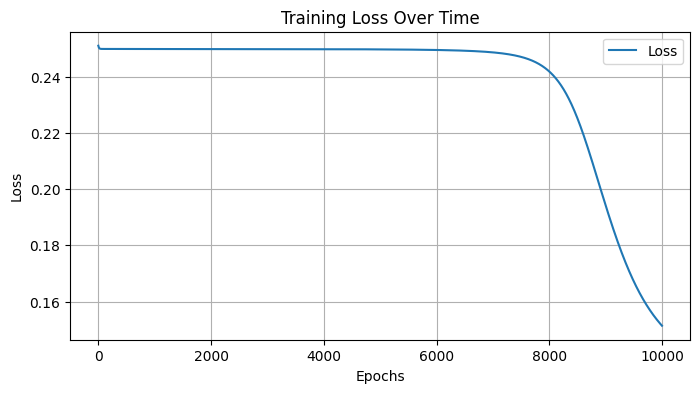

Final predictions:
[[0.19451966]
 [0.45378567]
 [0.85153969]
 [0.49724308]]


In [12]:
# 🔹 Шаг 3: Активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 🔹 Шаг 4: Обучение
learning_rate = 0.1
losses = []

for epoch in range(10000):
    # Прямой проход
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)  # Выход скрытого слоя
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)  # Предсказание

    # Вычисление ошибки
    loss = np.mean((y - y_hat) ** 2)
    losses.append(loss)

    # Обратный проход
    d_loss = y_hat - y  # Градиент ошибки
    d_z2 = d_loss * sigmoid_derivative(y_hat)  # Градиент на выходном слое
    d_W2 = np.dot(a1.T, d_z2)                  # Градиент весов W2
    d_b2 = np.sum(d_z2, axis=0, keepdims=True) # Градиент смещений b2

    d_a1 = np.dot(d_z2, W2.T)                  # Градиент активации скрытого слоя
    d_z1 = d_a1 * sigmoid_derivative(a1)       # Градиент на скрытом слое
    d_W1 = np.dot(X.T, d_z1)                   # Градиент весов W1
    d_b1 = np.sum(d_z1, axis=0, keepdims=True) # Градиент смещений b1

    # Обновление параметров
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

# 🔹 Шаг 5: Визуализация ошибки
plt.figure(figsize=(8, 4))
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 Шаг 6: Проверка предсказаний
print("Final predictions:")
print(y_hat)
